<a href="https://colab.research.google.com/github/AshwinRS07/DC_EV-ParkStations/blob/main/UrbanComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
import sys
dir_path = '/content/gdrive/MyDrive/Urban Computing Project'
sys.path.append(dir_path)

In [ ]:
#!pip install census
#!pip install us
#!pip install censusdata

In [ ]:
#!pip install geopandas==0.8.1 matplotlib==3.2.2 networkx==2.3  numpy==1.18.5  pandas==1.0.5  seaborn==0.10.1

In [ ]:
# including modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import seaborn as sns
import operator
import numpy as np
import geopandas as gp
%load_ext autoreload
%autoreload 2
import networkx as nx
import community
import random
import pyproj
from shapely.geometry import Point

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Alternative Fuel Stations data
fuelstation_df = pd.read_csv("/content/gdrive/MyDrive/Urban Computing Project/Charging_Stations.csv".format(dir_path))
print('Shape of the dataframe:',fuelstation_df.shape,'\n')
print('Printing one record:',fuelstation_df[:1].T)

Shape of the dataframe: (57419, 65) 

Printing one record:                                                                              0
Fuel Type Code                                                             CNG
Station Name                                               PS Energy - Atlanta
Street Address                                                340 Whitehall St
Intersection Directions      From I-7585 N, exit 91 to Central Ave, left on...
City                                                                   Atlanta
...                                                                        ...
CNG PSI                                                                   3600
CNG Vehicle Class                                                           MD
LNG Vehicle Class                                                          NaN
EV On-Site Renewable Source                                                NaN
Restricted Access                                                       

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,6,13,14,15,16,20,29,31,33,34,35,36,39,40,41,43,45,46,47,49,52,53,55,56,57,58,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Parking Meter data
parking_df = pd.read_csv("/content/gdrive/MyDrive/Urban Computing Project/Parking_Meter_Spaces.csv".format(dir_path))
print('Shape of the dataframe:',fuelstation_df.shape,'\n')
print('Printing one record:',fuelstation_df[:1].T)

Shape of the dataframe: (242, 65) 

Printing one record:                                                  0
Fuel Type Code                                 E85
Station Name                   Sunoco - Georgetown
Street Address               2450 Wisconsin Ave NW
Intersection Directions                        NaN
City                                    Washington
...                                            ...
CNG PSI                                        NaN
CNG Vehicle Class                              NaN
LNG Vehicle Class                              NaN
EV On-Site Renewable Source                    NaN
Restricted Access                              NaN

[65 rows x 1 columns]


In [ ]:
fuelstation_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,E85,Sunoco - Georgetown,2450 Wisconsin Ave NW,NaN,Washington,DC,20007,NaN,202-337-6277,E,NaN,Public,24 hours daily,A Cash D M V Voyager Wright_Exp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200-9,38.922384,-77.073001,2021-09-10,31943,2021-09-10 19:40:26 UTC,P,NaN,NaN,2014-10-13,NaN,NaN,NaN,False,NaN,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,CONVENIENCE_STORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,One Parking,555 12th St NW,NaN,Washington,DC,20004,NaN,202-393-0649,E,NaN,Public,Restricted to garage hours; pay lot; leave key,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,Non-Networked,NaN,200-9,38.896703,-77.027621,2021-12-09,43836,2021-12-09 15:02:43 UTC,P,NaN,NaN,2012-03-01,NaN,NaN,NaN,NaN,J1772 NEMA515,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,PAY_GARAGE,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Washington Navy Yard,1314 Harwood St.,NaN,Washington,DC,20003,NaN,855-885-9571,E,NaN,Public,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,OpConnect,http://www.opconnect.com/,GPS,38.874415,-76.992381,2021-12-11,47194,2021-12-11 02:00:21 UTC,NaN,NaN,NaN,2012-05-09,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LENKIN CO 1300 B,1300 19th St NW,NaN,Washington,DC,20036,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,38.907454,-77.043971,2021-12-11,56564,2021-12-11 00:32:26 UTC,NaN,NaN,NaN,2012-01-31,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,WASH HARBOUR STATION 1,3000 K St NW,NaN,Washington,DC,20007,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,38.901780,-77.059732,2021-12-11,57221,2021-12-11 00:32:26 UTC,NaN,NaN,NaN,2011-12-15,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
parking_df.head()

,X,Y,OBJECTID,METERID,ROUTEID,SIDE,MEAS,DDOTLON,DDOTLAT,DDOTMDSPX,DDOTMDSPY,MULTISPACEZONE,MULTISPACENUMBER,MULTISPACESENSOR,MULTISPACESTATE,TRANSMISSIONDATE,ERRORCODES,LONGIITUDE,LATITUDE,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE
0,172.123015,24.058083,725915,32644492,NaN,NaN,NaN,-77.079243,38.946984,NaN,NaN,913,32644492,NO,Installed,2020/11/24 20:43:08,NaN,-77.079243,38.946984,NaN,NaN,NaN,NaN
1,172.123015,24.058083,725916,32644692,NaN,NaN,NaN,-77.079243,38.946984,NaN,NaN,Unassigned,32644692,NO,Installed,2020/11/24 20:43:08,NaN,-77.079243,38.946984,NaN,NaN,NaN,NaN
2,172.118878,24.057743,725917,34064191,NaN,NaN,NaN,-77.080931,38.949733,NaN,NaN,913,34064191,NO,Installed,2020/11/24 20:43:08,NaN,-77.080931,38.949733,NaN,NaN,NaN,NaN
3,172.119498,24.063052,725918,34153891,NaN,NaN,NaN,-77.075617,38.950785,NaN,NaN,Unassigned,34153891,NO,Installed,2021/03/03 14:40:52,NaN,-77.075617,38.950785,NaN,NaN,NaN,NaN
4,172.119597,24.062974,725919,34153892,NaN,NaN,NaN,-77.075660,38.950695,NaN,NaN,Unassigned,34153892,NO,Installed,2021/03/03 14:29:45,NaN,-77.075660,38.950695,NaN,NaN,NaN,NaN


In [ ]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# import street map
street_map = gpd.read_file("/content/gdrive/MyDrive/Urban Computing Project/Washington_DC_Boundary.shp")

In [ ]:
# designate coordinate system for fuelstation
crs = {"init":"epsg:4326"}# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(fuelstation_df["Longitude"], fuelstation_df["Latitude"])]# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(fuelstation_df,crs = crs,geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# designate coordinate system for parking
crs1 = {"init":"epsg:4326"}# zip x and y coordinates into single feature
geometry1 = [Point(xy) for xy in zip(parking_df["LONGIITUDE"], parking_df["LATITUDE"])]# create GeoPandas dataframe
geo1_df = gpd.GeoDataFrame(parking_df,crs = crs1,geometry = geometry1)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geo1_df.head()

,X,Y,OBJECTID,METERID,ROUTEID,SIDE,MEAS,DDOTLON,DDOTLAT,DDOTMDSPX,DDOTMDSPY,MULTISPACEZONE,MULTISPACENUMBER,MULTISPACESENSOR,MULTISPACESTATE,TRANSMISSIONDATE,ERRORCODES,LONGIITUDE,LATITUDE,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,geometry
0,172.123015,24.058083,725915,32644492,NaN,NaN,NaN,-77.079243,38.946984,NaN,NaN,913,32644492,NO,Installed,2020/11/24 20:43:08,NaN,-77.079243,38.946984,NaN,NaN,NaN,NaN,POINT (-77.07924 38.94698)
1,172.123015,24.058083,725916,32644692,NaN,NaN,NaN,-77.079243,38.946984,NaN,NaN,Unassigned,32644692,NO,Installed,2020/11/24 20:43:08,NaN,-77.079243,38.946984,NaN,NaN,NaN,NaN,POINT (-77.07924 38.94698)
2,172.118878,24.057743,725917,34064191,NaN,NaN,NaN,-77.080931,38.949733,NaN,NaN,913,34064191,NO,Installed,2020/11/24 20:43:08,NaN,-77.080931,38.949733,NaN,NaN,NaN,NaN,POINT (-77.08093 38.94973)
3,172.119498,24.063052,725918,34153891,NaN,NaN,NaN,-77.075617,38.950785,NaN,NaN,Unassigned,34153891,NO,Installed,2021/03/03 14:40:52,NaN,-77.075617,38.950785,NaN,NaN,NaN,NaN,POINT (-77.07562 38.95078)
4,172.119597,24.062974,725919,34153892,NaN,NaN,NaN,-77.075660,38.950695,NaN,NaN,Unassigned,34153892,NO,Installed,2021/03/03 14:29:45,NaN,-77.075660,38.950695,NaN,NaN,NaN,NaN,POINT (-77.07566 38.95070)


In [ ]:
geo2_df.head()

NameError: ignored

In [ ]:
#extracting DC fuelstations
dc_dataframe = geo_df[geo_df['State'] == 'DC']
dc_dataframe["Vehicle Ownership Group"]="15-23%"

In [ ]:
dc_dataframe["Vehicle Ownership Group"].loc[((dc_dataframe["Latitude"] > 38.900) & (dc_dataframe["Longitude"] < -77.08))] = "15-23%"
dc_dataframe["Vehicle Ownership Group"].loc[((dc_dataframe["Latitude"] < 38.890) & (dc_dataframe["Longitude"] > -77.08))] = "32.4-60%"
dc_dataframe["Vehicle Ownership Group"].loc[((dc_dataframe["Latitude"] > 38.890) & (dc_dataframe["Longitude"] > -77.08) & (dc_dataframe["Longitude"] < -77.01)& (dc_dataframe["Latitude"] < 38.920))] = "60-80%"
dc_dataframe["Vehicle Ownership Group"].loc[((dc_dataframe["Latitude"] > 38.890) & (dc_dataframe["Longitude"] > -77.01))] = "23-32.4%"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


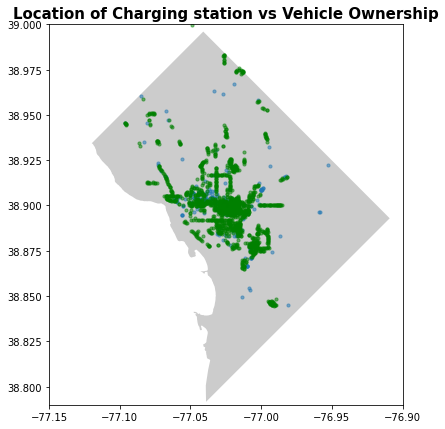

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(7,7))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color="grey")

dc_dataframe.plot(ax=ax,alpha=0.5,legend=True,markersize=10)
geo1_df.plot(ax=ax,alpha=0.5, legend=True,markersize=10,color="green")
# add title to graph
plt.title("Location of Charging station vs Vehicle Ownership", fontsize=15,fontweight="bold")


#set latitiude and longitude boundaries for map display
plt.xlim(-77.150,-76.900)
plt.ylim( 38.790,39.000)


plt.show()

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(7,7))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color="grey")

geo1_df.plot(column="Vehicle Ownership Group",ax=ax,alpha=0.5,legend=True,markersize=10)
#geo1_df.plot(ax=ax,alpha=0.5, legend=True,markersize=10,color="green")
# add title to graph
plt.title("Parking Spaces in DC", fontsize=15,fontweight="bold")


#set latitiude and longitude boundaries for map display
plt.xlim(-77.150,-76.900)
plt.ylim( 38.790,39.000)


plt.show()

In [ ]:
import folium
import geopy
from sklearn import preprocessing, cluster

In [ ]:
city = "Washington"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Washington, District of Columbia, United States
[lat, long]: [38.8950368, -77.0365427]


In [ ]:
x, y = "Latitude", "Longitude"
color = "Vehicle Ownership Group"
size = "Vehicle Ownership Group"
popup = "Street Address"
data = dc_dataframe.copy()
## create color column
lst_colors=["red","green","blue","orange"]
lst_elements = sorted(list(dc_dataframe[color].unique()))
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)

## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""

map_.get_root().html.add_child(folium.Element(legend_html))
## plot the map
map_

ValueError: ignored